In [ ]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [ ]:
# Load the stock data
df_stock = web.DataReader("DJIA", data_source="yahoo", start="2008-08-08", 
                          end="2016-07-01")
 
# Show the stock data
df_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4966810000,11734.320312
2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5067310000,11782.349609
2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4711290000,11642.469727
2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4787600000,11532.959961
2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4064000000,11615.929688
...,...,...,...,...,...,...
2016-06-27,17355.210938,17005.439453,17355.210938,17140.240234,5431220000,17140.240234
2016-06-28,17453.929688,17174.960938,17190.509766,17409.720703,4385810000,17409.720703
2016-06-29,17737.380859,17456.019531,17456.019531,17694.679688,4241740000,17694.679688


In [ ]:
df_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13578.978218,13338.995433,13459.334488,13463.026799,4.142490e+09,13463.026799
std,3141.614427,3145.966243,3143.413033,3143.992817,1.234396e+09,3143.992817
min,6758.439941,6440.080078,6547.009766,6547.049805,1.025000e+09,6547.049805
25%,11041.019531,10788.769531,10907.339844,10913.379883,3.364080e+09,10913.379883
50%,13119.120117,12931.629883,13022.049805,13025.580078,3.870040e+09,13025.580078
75%,16595.740234,16358.570312,16477.699219,16478.410156,4.659740e+09,16478.410156
max,18421.130859,18212.570312,18315.060547,18312.390625,1.145623e+10,18312.390625


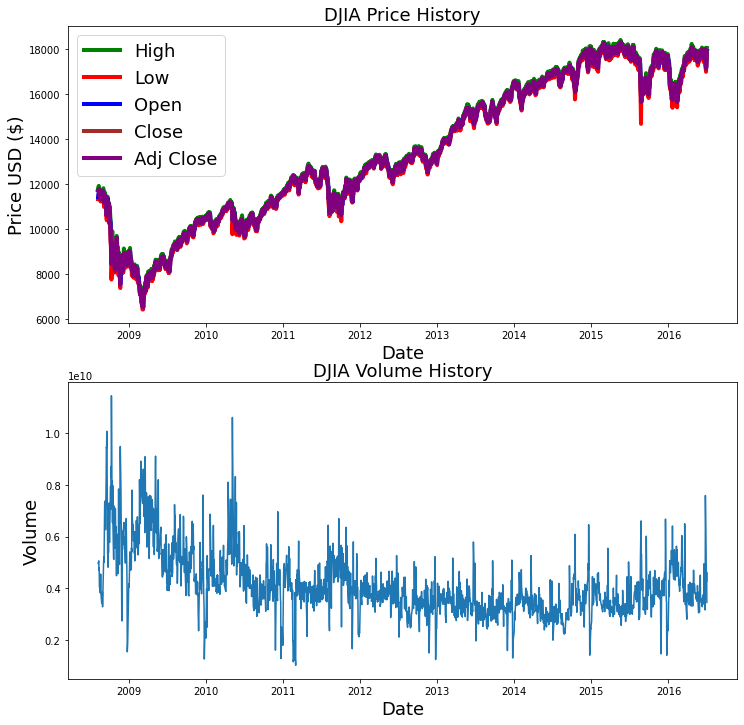

In [ ]:
# Visualize
f, axs = plt.subplots(2, 1)

axs[0].plot(df_stock["High"], color="green", linewidth=4, label="High")
axs[0].plot(df_stock["Low"], color="red", linewidth=4, label="Low")
axs[0].plot(df_stock["Open"], color="blue", linewidth=4, label="Open")
axs[0].plot(df_stock["Close"], color="brown", linewidth=4, label="Close")
axs[0].plot(df_stock["Adj Close"], color="purple", linewidth=4, label="Adj Close")
axs[0].set_title("DJIA Price History", fontsize = 18)
axs[0].set_xlabel("Date", fontsize = 18)
axs[0].set_ylabel("Price USD ($)", fontsize = 18)
axs[0].legend(fontsize = 18)

axs[1].plot(df_stock["Volume"])
axs[1].set_title("DJIA Volume History", fontsize = 18)
axs[1].set_xlabel("Date", fontsize = 18)
axs[1].set_ylabel("Volume", fontsize = 18)

f.set_size_inches(12,12)
plt.show()

In [ ]:
#check if close and adj close is ever different
diff_index = []
for row in range(len(df_stock)):
    if df_stock["Close"][row] != df_stock["Adj Close"][row]:
        diff_index.append(row)

diff_index

[]

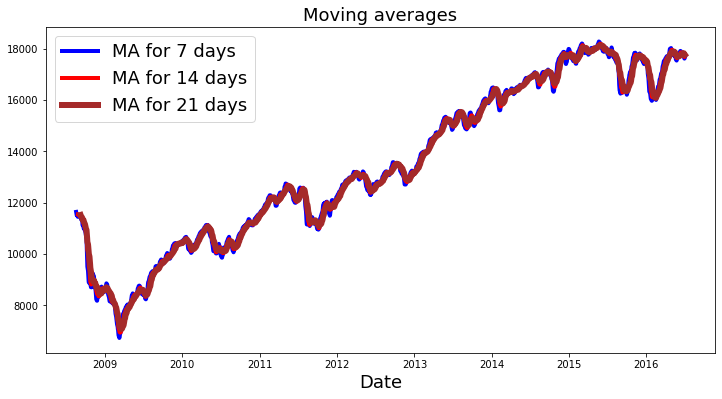

In [ ]:
# Calculate moving average for 10, 20, 50 days
ma_day = [7, 14, 21]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  df_stock[column_name] = df_stock["Adj Close"].rolling(ma).mean()

# Visualize the moving averages
f = plt.figure(figsize=(16,8))
plt.title("Moving averages", fontsize = 18)
plt.plot(df_stock["MA for 7 days"], color = "blue", linewidth = 4,
         label = "MA for 7 days")
plt.plot(df_stock["MA for 14 days"], color = "red", linewidth = 4,
         label = "MA for 14 days")
plt.plot(df_stock["MA for 21 days"], color = "brown", linewidth = 6, 
         label = "MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

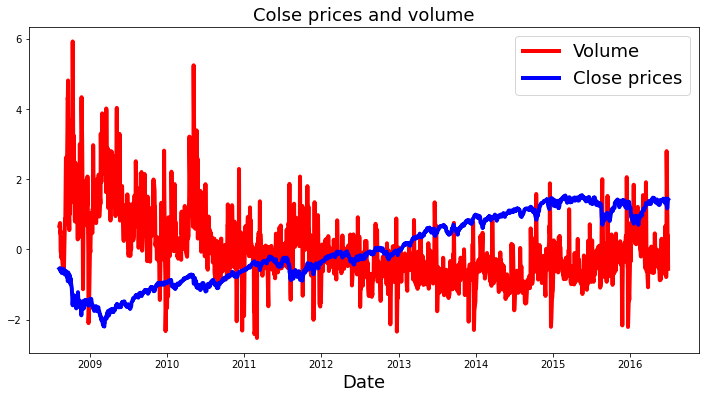

In [ ]:
#check volatility with MA and create MA for that
# Visualize the moving averages and volume
# first create normalized input for plot
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_vol_norm = (df_stock["Volume"] - df_stock["Volume"].mean())/df_stock["Volume"].std()

f = plt.figure(figsize=(16,8))
plt.title("Colse prices and volume", fontsize = 18)
plt.plot(df_stock_vol_norm, color = "red", linewidth = 4,
         label = "Volume")
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

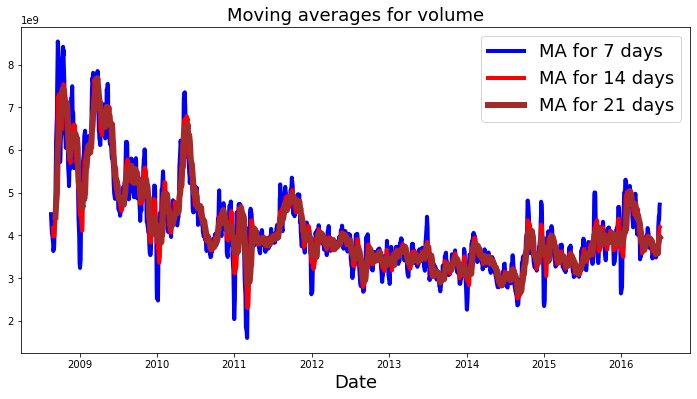

In [ ]:
#move averages for volume and plot for them
for ma in ma_day:
  column_name = f"Volume MA for {ma} days"
  df_stock[column_name] = df_stock["Volume"].rolling(ma).mean()

# Visualize the moving averages
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for volume", fontsize = 18)
plt.plot(df_stock["Volume MA for 7 days"], color = "blue", linewidth = 4,
         label = "MA for 7 days")
plt.plot(df_stock["Volume MA for 14 days"], color = "red", linewidth = 4,
         label = "MA for 14 days")
plt.plot(df_stock["Volume MA for 21 days"], color = "brown", linewidth = 6, 
         label = "MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

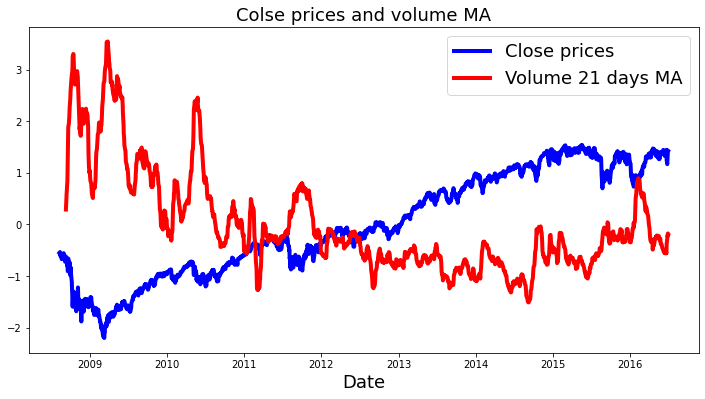

In [ ]:
# Visualize the moving averages and volume
# first create normalized input for plot
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_vol_MA_norm = (df_stock["Volume MA for 21 days"] - df_stock["Volume MA for 21 days"].mean())/df_stock["Volume MA for 21 days"].std()

f = plt.figure(figsize=(16,8))
plt.title("Colse prices and volume MA", fontsize = 18)
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.plot(df_stock_vol_MA_norm, color = "red", linewidth = 4,
         label = "Volume 21 days MA")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

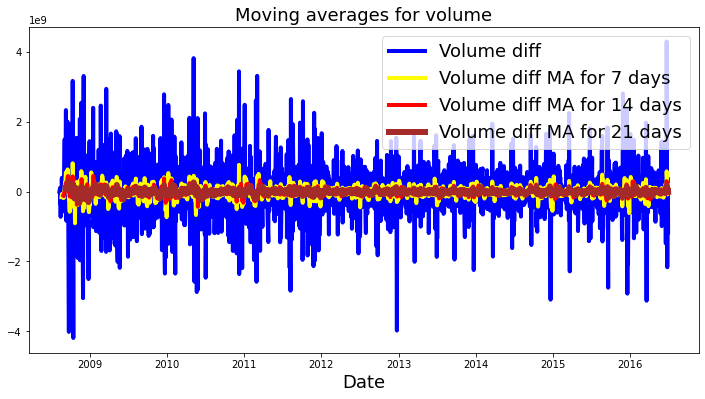

In [ ]:
#calculate the diff volume for the before day
diff_volume = []
for row in range(len(df_stock)):
    if row == 0:
        diff_volume.append(0)
    else:
        diff_volume.append(df_stock["Volume"][row] - df_stock["Volume"][row - 1])

df_stock["Volume diff"] = diff_volume

for ma in ma_day:
  column_name = f"Volume diff MA for {ma} days"
  df_stock[column_name] = df_stock["Volume diff"].rolling(ma).mean()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for volume", fontsize = 18)
plt.plot(df_stock["Volume diff"], color = "blue", linewidth = 4,
         label = "Volume diff")
plt.plot(df_stock["Volume diff MA for 7 days"], color = "yellow", linewidth = 4,
         label = "Volume diff MA for 7 days")
plt.plot(df_stock["Volume diff MA for 14 days"], color = "red", linewidth = 4,
         label = "Volume diff MA for 14 days")
plt.plot(df_stock["Volume diff MA for 21 days"], color = "brown", linewidth = 6, 
         label = "Volume diff MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

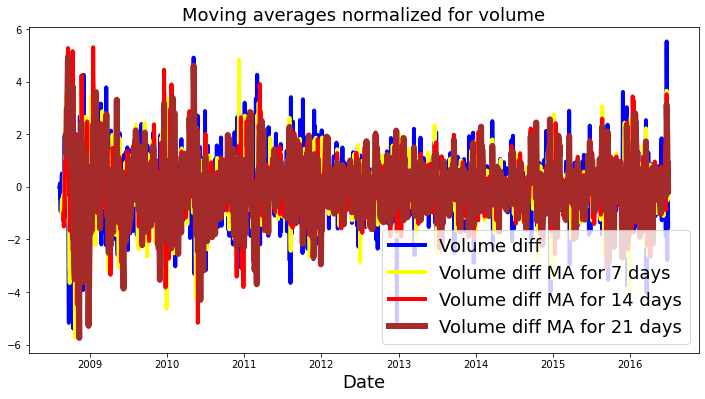

In [ ]:
#volume changes visualization after normalization
df_stock_vol_diff_norm = (df_stock["Volume diff"] - df_stock["Volume diff"].mean())/df_stock["Volume diff"].std()
df_stock_vol_diff_7MA_norm = (df_stock["Volume diff MA for 7 days"] - df_stock["Volume diff MA for 7 days"].mean())/df_stock["Volume diff MA for 7 days"].std()
df_stock_vol_diff_14MA_norm = (df_stock["Volume diff MA for 14 days"] - df_stock["Volume diff MA for 14 days"].mean())/df_stock["Volume diff MA for 14 days"].std()
df_stock_vol_diff_21MA_norm = (df_stock["Volume diff MA for 21 days"] - df_stock["Volume diff MA for 21 days"].mean())/df_stock["Volume diff MA for 21 days"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages normalized for volume", fontsize = 18)
plt.plot(df_stock_vol_diff_norm, color = "blue", linewidth = 4,
         label = "Volume diff")
plt.plot(df_stock_vol_diff_7MA_norm, color = "yellow", linewidth = 4,
         label = "Volume diff MA for 7 days")
plt.plot(df_stock_vol_diff_14MA_norm, color = "red", linewidth = 4,
         label = "Volume diff MA for 14 days")
plt.plot(df_stock_vol_diff_21MA_norm, color = "brown", linewidth = 6, 
         label = "Volume diff MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

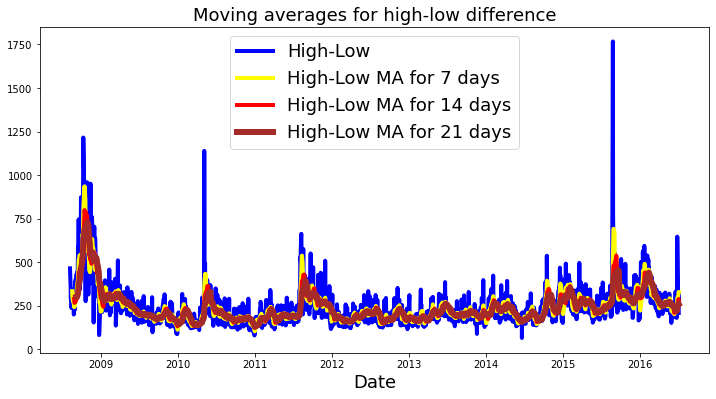

In [ ]:
#H-L with MA
diff_H_L = []
for row in range(len(df_stock)):
    diff_H_L.append(df_stock["High"][row] - df_stock["Low"][row])

df_stock["High-Low"] = diff_H_L

for ma in ma_day:
  column_name = f"High-Low MA for {ma} days"
  df_stock[column_name] = df_stock["High-Low"].rolling(ma).mean()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for high-low difference", fontsize = 18)
plt.plot(df_stock["High-Low"], color = "blue", linewidth = 4,
         label = "High-Low")
plt.plot(df_stock["High-Low MA for 7 days"], color = "yellow", linewidth = 4,
         label = "High-Low MA for 7 days")
plt.plot(df_stock["High-Low MA for 14 days"], color = "red", linewidth = 4,
         label = "High-Low MA for 14 days")
plt.plot(df_stock["High-Low MA for 21 days"], color = "brown", linewidth = 6, 
         label = "High-Low MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

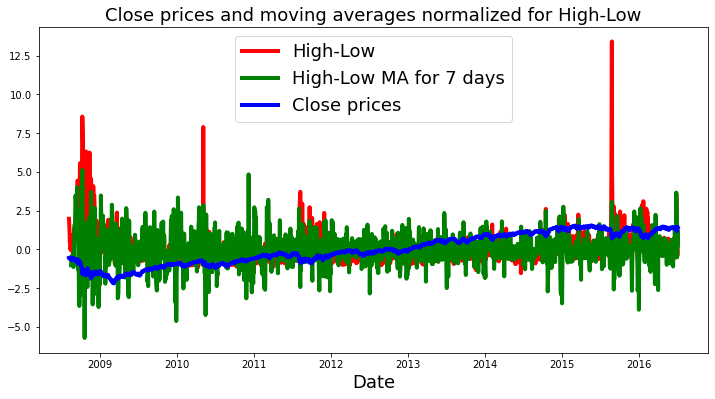

In [ ]:
#plot H-L normalised with close values
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_h_l_norm = (df_stock["High-Low"] - df_stock["High-Low"].mean())/df_stock["High-Low"].std()
df_stock_h_l_norm_7MA_norm = (df_stock["Volume diff MA for 7 days"] - df_stock["Volume diff MA for 7 days"].mean())/df_stock["Volume diff MA for 7 days"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Close prices and moving averages normalized for High-Low", fontsize = 18)
plt.plot(df_stock_h_l_norm, color = "red", linewidth = 4,
         label = "High-Low")
plt.plot(df_stock_h_l_norm_7MA_norm, color = "green", linewidth = 4,
         label = "High-Low MA for 7 days")
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

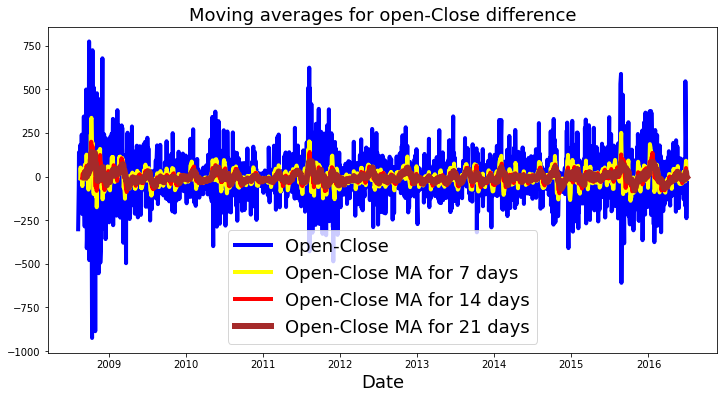

In [59]:
#O-C with MA
diff_O_C = []
for row in range(len(df_stock)):
    diff_O_C.append(df_stock["Open"][row] - df_stock["Close"][row])

df_stock["Open-Close"] = diff_O_C

for ma in ma_day:
  column_name = f"Open-Close MA for {ma} days"
  df_stock[column_name] = df_stock["Open-Close"].rolling(ma).mean()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for open-Close difference", fontsize = 18)
plt.plot(df_stock["Open-Close"], color = "blue", linewidth = 4,
         label = "Open-Close")
plt.plot(df_stock["Open-Close MA for 7 days"], color = "yellow", linewidth = 4,
         label = "Open-Close MA for 7 days")
plt.plot(df_stock["Open-Close MA for 14 days"], color = "red", linewidth = 4,
         label = "Open-Close MA for 14 days")
plt.plot(df_stock["Open-Close MA for 21 days"], color = "brown", linewidth = 6, 
         label = "Open-Close MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

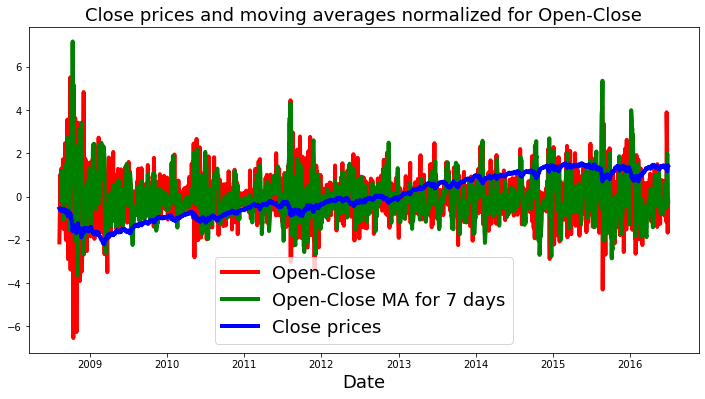

In [60]:
#plot H-L normalised with close values
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_o_c_norm = (df_stock["Open-Close"] - df_stock["Open-Close"].mean())/df_stock["Open-Close"].std()
df_stock_o_c_norm_7MA_norm = (df_stock["Open-Close MA for 7 days"] - df_stock["Open-Close MA for 7 days"].mean())/df_stock["Open-Close MA for 7 days"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Close prices and moving averages normalized for Open-Close", fontsize = 18)
plt.plot(df_stock_o_c_norm, color = "red", linewidth = 4,
         label = "Open-Close")
plt.plot(df_stock_o_c_norm_7MA_norm, color = "green", linewidth = 4,
         label = "Open-Close MA for 7 days")
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

HERE

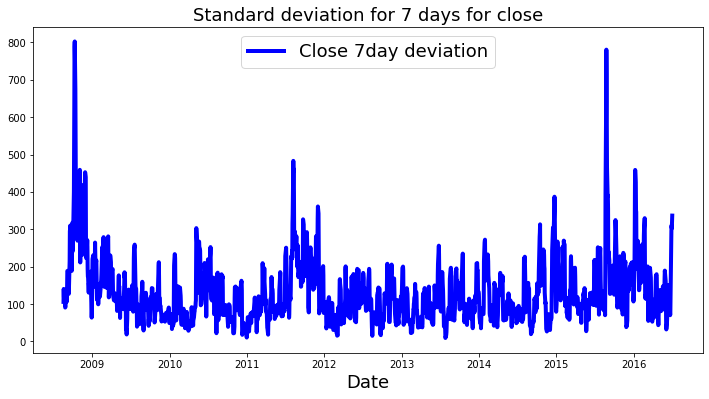

In [62]:
#close standard deviation
df_stock["Close 7day deviation"] = df_stock["Close"].rolling(7).std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Standard deviation for 7 days for close", fontsize = 18)
plt.plot(df_stock["Close 7day deviation"], color = "blue", linewidth = 4,
         label = "Close 7day deviation")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

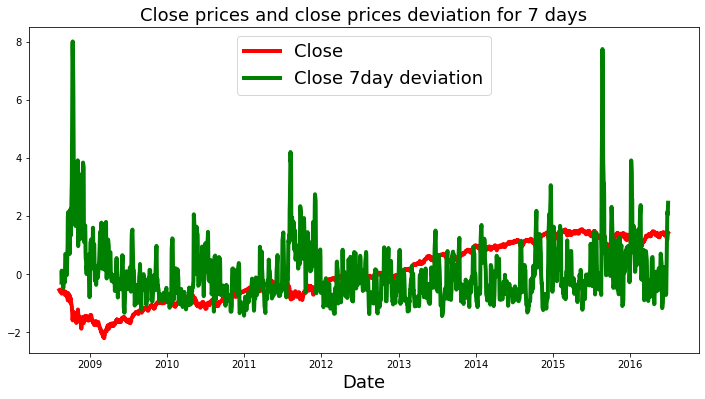

In [64]:
#plot colse std normalised with close values
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_c_std_norm = (df_stock["Close 7day deviation"] - df_stock["Close 7day deviation"].mean())/df_stock["Close 7day deviation"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Close prices and close prices deviation for 7 days", fontsize = 18)
plt.plot(df_stock_close_norm, color = "red", linewidth = 4,
         label = "Close")
plt.plot(df_stock_c_std_norm, color = "green", linewidth = 4,
         label = "Close 7day deviation")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()